Importing Necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


Reading Data.csv

In [2]:
data = pd.read_csv('train.csv')
test_data1 = pd.read_csv('test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Performing Data sorting and filling NaN Values

In [4]:
# Drop irrelevant features & Converting Categorical to Numerical, Float to int
data = data.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [5]:
# Extract ticket prefixes from the 'Ticket' column
data['TicketPrefix'] = data['Ticket'].str.extract('([A-Za-z\.]+)', expand=False)

# Map unique ticket prefixes to numerical values
prefix_mapping = {prefix: i for i, prefix in enumerate(data['TicketPrefix'].unique())}

# Replace ticket prefixes with their corresponding numerical values
data['TicketPrefix'] = data['TicketPrefix'].map(prefix_mapping)

# Drop the original 'Ticket' column
data = data.drop('Ticket', axis=1)


In [6]:
fare = pd.DataFrame(data['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
print(newfare)
data['Fare_1'] = newfare

[[0.01415106]
 [0.13913574]
 [0.01546857]
 [0.1036443 ]
 [0.01571255]
 [0.0165095 ]
 [0.10122886]
 [0.04113566]
 [0.02173075]
 [0.05869429]
 [0.03259623]
 [0.05182215]
 [0.01571255]
 [0.06104473]
 [0.01533038]
 [0.03122992]
 [0.05684821]
 [0.02537431]
 [0.03513366]
 [0.01410226]
 [0.05074862]
 [0.02537431]
 [0.01567195]
 [0.06929139]
 [0.04113566]
 [0.06126432]
 [0.01410226]
 [0.51334181]
 [0.01537917]
 [0.01541158]
 [0.0541074 ]
 [0.28598956]
 [0.01512699]
 [0.02049464]
 [0.16038672]
 [0.10149724]
 [0.01411046]
 [0.01571255]
 [0.03513366]
 [0.02194234]
 [0.01849397]
 [0.04098927]
 [0.01541158]
 [0.08115719]
 [0.01537917]
 [0.01571255]
 [0.03025399]
 [0.01512699]
 [0.04231498]
 [0.03474329]
 [0.07746484]
 [0.01522459]
 [0.14976542]
 [0.05074862]
 [0.12097534]
 [0.06929139]
 [0.02049464]
 [0.01411046]
 [0.05416439]
 [0.0915427 ]
 [0.01411046]
 [0.1561496 ]
 [0.16293235]
 [0.05445717]
 [0.0541074 ]
 [0.02975782]
 [0.02049464]
 [0.01592394]
 [0.01546857]
 [0.01690807]
 [0.02049464]
 [0.09

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,Fare_1
0,0,3,male,22.0,1,0,7.2500,S,0,0.014151
1,1,1,female,38.0,1,0,71.2833,C,1,0.139136
2,1,3,female,26.0,0,0,7.9250,S,2,0.015469
3,1,1,female,35.0,1,0,53.1000,S,3,0.103644
4,0,3,male,35.0,0,0,8.0500,S,3,0.015713


In [8]:
print(data.isnull().sum())

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
TicketPrefix      0
Fare_1            0
dtype: int64


In [9]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Age'] = data['Age'].astype(int)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print(data.isnull().sum())

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
TicketPrefix    0
Fare_1          0
dtype: int64


In [10]:
data['Age'] = data['Age'].astype(int)

In [11]:
# Convert categorical features to numerical
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,Fare_1
0,0,3,1,22,1,0,7.2500,0,0,0.014151
1,1,1,0,38,1,0,71.2833,1,1,0.139136
2,1,3,0,26,0,0,7.9250,0,2,0.015469
3,1,1,0,35,1,0,53.1000,0,3,0.103644
4,0,3,1,35,0,0,8.0500,0,3,0.015713


In [13]:
X = data.drop(['Survived',"Fare"], axis=1)
y = data['Survived']

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [16]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8435754189944135


[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


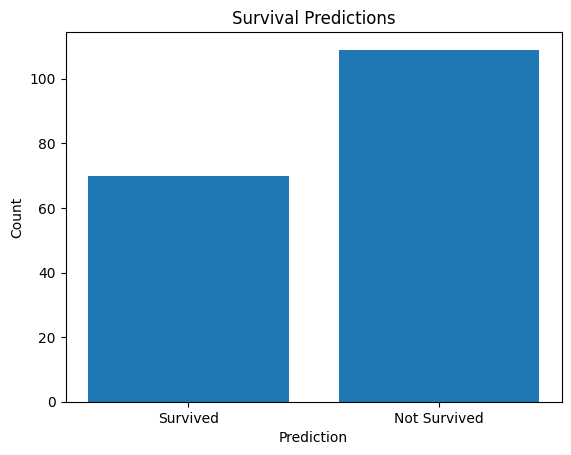

In [19]:
print(y_pred)
import matplotlib.pyplot as plt

# Count the number of survivors and non-survivors
survived_count = sum(y_pred)
not_survived_count = len(y_pred) - survived_count

# Create a bar plot
plt.bar(['Survived', 'Not Survived'], [survived_count, not_survived_count])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Survival Predictions')

# Display the plot
plt.show()

**Testing on test.csv dataset**

In [20]:
test_data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
# Drop irrelevant features & Converting Categorical to Numerical, Float to int
test_data1 = test_data1.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [22]:
# Extract ticket prefixes from the 'Ticket' column
test_data1['TicketPrefix'] = test_data1['Ticket'].str.extract('([A-Za-z\.]+)', expand=False)

# Map unique ticket prefixes to numerical values
prefix_mapping = {prefix: i for i, prefix in enumerate(test_data1['TicketPrefix'].unique())}

# Replace ticket prefixes with their corresponding numerical values
test_data1['TicketPrefix'] = test_data1['TicketPrefix'].map(prefix_mapping)

# Drop the original 'Ticket' column
test_data1 = test_data1.drop('Ticket', axis=1)

In [23]:
fare = pd.DataFrame(test_data1['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
print(newfare)
test_data1['Fare_1'] = newfare


[[0.01528158]
 [0.01366309]
 [0.01890874]
 [0.01690807]
 [0.0239836 ]
 [0.018006  ]
 [0.01489121]
 [0.05660423]
 [0.01411046]
 [0.04713766]
 [0.01541158]
 [0.05074862]
 [0.1605739 ]
 [0.05074862]
 [0.11940565]
 [0.0541074 ]
 [0.02410559]
 [0.01410226]
 [0.01546857]
 [0.01410226]
 [0.11594108]
 [0.00618899]
 [0.06184168]
 [0.11980422]
 [0.51212189]
 [0.02830212]
 [0.12097534]
 [0.01410226]
 [0.05953204]
 [0.04231498]
 [0.05074862]
 [0.06148391]
 [0.04015973]
 [0.04577135]
 [0.11272049]
 [0.01411046]
 [0.01571255]
 [0.01690807]
 [0.01854277]
 [0.11027246]
 [0.02618765]
 [0.05182215]
 [0.01532218]
 [0.02537431]
 [0.10257897]
 [0.01546857]
 [0.05797054]
 [0.01512699]
 [0.14891148]
 [0.03103473]
 [0.1171122 ]
 [0.02934305]
 [0.04489301]
 [0.51334181]
 [0.03040857]
 [0.05684821]
 [0.01541158]
 [0.01493181]
 [0.03142511]
 [0.51212189]
 [0.01541158]
 [0.02635025]
 [0.01512699]
 [0.0150782 ]
 [0.51212189]
 [0.04098927]
 [0.01537917]
 [0.08275929]
 [0.05570149]
 [0.51334181]
 [0.01512699]
 [0.01

In [24]:
test_data1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,Fare_1
0,3,male,34.5,0,0,7.8292,Q,0,0.015282
1,3,female,47.0,1,0,7.0000,S,0,0.013663
2,2,male,62.0,0,0,9.6875,Q,0,0.018909
3,3,male,27.0,0,0,8.6625,S,0,0.016908
4,3,female,22.0,1,1,12.2875,S,0,0.023984
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,12,0.015713
414,1,female,39.0,0,0,108.9000,C,5,0.212559
415,3,male,38.5,0,0,7.2500,S,9,0.014151
416,3,male,NaN,0,0,8.0500,S,0,0.015713


In [25]:
# Fill missing values
test_data1 = test_data1.drop("Fare", axis=1)
test_data1['Age'].fillna(test_data1['Age'].median(), inplace=True)
test_data1['Fare_1'].fillna(test_data1['Fare_1'].median(), inplace=True)
test_data1['Age'] = test_data1['Age'].astype(int)
test_data1['Embarked'].fillna(test_data1['Embarked'].mode()[0], inplace=True)
print(test_data1.isnull().sum())

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Embarked        0
TicketPrefix    0
Fare_1          0
dtype: int64


In [26]:
test_data1

,Pclass,Sex,Age,SibSp,Parch,Embarked,TicketPrefix,Fare_1
0,3,male,34,0,0,Q,0,0.015282
1,3,female,47,1,0,S,0,0.013663
2,2,male,62,0,0,Q,0,0.018909
3,3,male,27,0,0,S,0,0.016908
4,3,female,22,1,1,S,0,0.023984
...,...,...,...,...,...,...,...,...
413,3,male,27,0,0,S,12,0.015713
414,1,female,39,0,0,C,5,0.212559
415,3,male,38,0,0,S,9,0.014151
416,3,male,27,0,0,S,0,0.015713


In [27]:
test_data1['Age'] = test_data1['Age'].astype(int)

In [28]:
# Convert categorical features to numerical
test_data1['Sex'] = test_data1['Sex'].map({'female': 0, 'male': 1})
test_data1['Embarked'] = test_data1['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [29]:
# Make predictions on the test dataset
predictions = model.predict(test_data1)


[0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


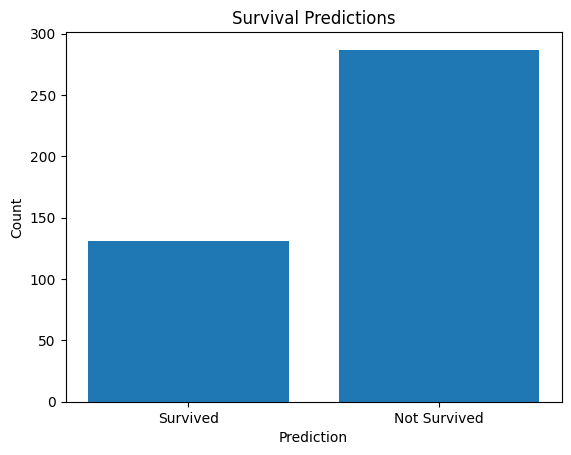

In [30]:
# Print the predictions
print(predictions)

# Count the number of survivors and non-survivors
survived_count = sum(predictions)
not_survived_count = len(predictions) - survived_count

# Create a bar plot
plt.bar(['Survived', 'Not Survived'], [survived_count, not_survived_count])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Survival Predictions')

# Display the plot
plt.show()